In [286]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LassoLars, LogisticRegression, Ridge, Lasso, RidgeCV,ElasticNetCV,ElasticNetCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB

import requests
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

In [217]:
df= pd.read_csv('./Hotel_Reviews.csv')

In [218]:
df.shape

(515738, 17)

In [219]:
df = df.loc[:100_000,:]

In [220]:
df.shape

(100001, 17)

In [221]:
df = df.reset_index() 

In [222]:
df.shape

(100001, 18)

In [223]:
df.drop(['index'], inplace=True, axis=1)

In [224]:
df.shape

(100001, 17)

In [225]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [226]:
df.isnull().sum()

Hotel_Address                                  0
Additional_Number_of_Scoring                   0
Review_Date                                    0
Average_Score                                  0
Hotel_Name                                     0
Reviewer_Nationality                           0
Negative_Review                                0
Review_Total_Negative_Word_Counts              0
Total_Number_of_Reviews                        0
Positive_Review                                0
Review_Total_Positive_Word_Counts              0
Total_Number_of_Reviews_Reviewer_Has_Given     0
Reviewer_Score                                 0
Tags                                           0
days_since_review                              0
lat                                           37
lng                                           37
dtype: int64

In [227]:
df.columns.values

array(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Tags', 'days_since_review', 'lat', 'lng'], dtype=object)

In [228]:
df.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [229]:
#sns.lmplot(x='Average_Score', y='Reviewer_Score', data=df)

In [230]:
#sns.lmplot(x='Review_Total_Positive_Word_Counts', y='Reviewer_Score', data=df)

In [231]:
#sns.lmplot(x='Review_Total_Negative_Word_Counts', y='Reviewer_Score', data=df)

# Dummying the reviewer nationality column

In [232]:
df = pd.get_dummies(df,
                          columns=['Reviewer_Nationality'],
                          drop_first=False)

In [233]:
df.shape

(100001, 213)

In [234]:
df.isnull().sum()

Hotel_Address                       0
Additional_Number_of_Scoring        0
Review_Date                         0
Average_Score                       0
Hotel_Name                          0
                                   ..
Reviewer_Nationality_ Venezuela     0
Reviewer_Nationality_ Vietnam       0
Reviewer_Nationality_ Yemen         0
Reviewer_Nationality_ Zambia        0
Reviewer_Nationality_ Zimbabwe      0
Length: 213, dtype: int64

In [235]:
len(df.columns)

213

In [236]:
corr = df.corr()

In [237]:
pd.set_option('display.max_columns', 9999)

In [238]:
corr.head(10)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Reviewer_Nationality_,Reviewer_Nationality_ Abkhazia Georgia,Reviewer_Nationality_ Afghanistan,Reviewer_Nationality_ Albania,Reviewer_Nationality_ Algeria,Reviewer_Nationality_ Andorra,Reviewer_Nationality_ Angola,Reviewer_Nationality_ Antarctica,Reviewer_Nationality_ Antigua Barbuda,Reviewer_Nationality_ Argentina,Reviewer_Nationality_ Armenia,Reviewer_Nationality_ Aruba,Reviewer_Nationality_ Australia,Reviewer_Nationality_ Austria,Reviewer_Nationality_ Azerbaijan,Reviewer_Nationality_ Bahamas,Reviewer_Nationality_ Bahrain,Reviewer_Nationality_ Bangladesh,Reviewer_Nationality_ Barbados,Reviewer_Nationality_ Belarus,Reviewer_Nationality_ Belgium,Reviewer_Nationality_ Belize,Reviewer_Nationality_ Benin,Reviewer_Nationality_ Bermuda,Reviewer_Nationality_ Bhutan,Reviewer_Nationality_ Bosnia and Herzegovina,Reviewer_Nationality_ Botswana,Reviewer_Nationality_ Brazil,Reviewer_Nationality_ British Virgin Islands,Reviewer_Nationality_ Brunei,Reviewer_Nationality_ Bulgaria,Reviewer_Nationality_ Burundi,Reviewer_Nationality_ Cambodia,Reviewer_Nationality_ Cameroon,Reviewer_Nationality_ Canada,Reviewer_Nationality_ Cayman Islands,Reviewer_Nationality_ Central Africa Republic,Reviewer_Nationality_ Chile,Reviewer_Nationality_ China,Reviewer_Nationality_ Colombia,Reviewer_Nationality_ Comoros,Reviewer_Nationality_ Costa Rica,Reviewer_Nationality_ Crimea,Reviewer_Nationality_ Croatia,Reviewer_Nationality_ Cura ao,Reviewer_Nationality_ Cyprus,Reviewer_Nationality_ Czech Republic,Reviewer_Nationality_ Democratic Republic of the Congo,Reviewer_Nationality_ Denmark,Reviewer_Nationality_ Dominican Republic,Reviewer_Nationality_ East Timor,Reviewer_Nationality_ Ecuador,Reviewer_Nationality_ Egypt,Reviewer_Nationality_ El Salvador,Reviewer_Nationality_ Equatorial Guinea,Reviewer_Nationality_ Estonia,Reviewer_Nationality_ Ethiopia,Reviewer_Nationality_ Falkland Islands Malvinas,Reviewer_Nationality_ Faroe Islands,Reviewer_Nationality_ Fiji,Reviewer_Nationality_ Finland,Reviewer_Nationality_ France,Reviewer_Nationality_ French Guiana,Reviewer_Nationality_ Gabon,Reviewer_Nationality_ Gambia,Reviewer_Nationality_ Georgia,Reviewer_Nationality_ Germany,Reviewer_Nationality_ Ghana,Reviewer_Nationality_ Gibraltar,Reviewer_Nationality_ Greece,Reviewer_Nationality_ Guadeloupe,Reviewer_Nationality_ Guam,Reviewer_Nationality_ Guatemala,Reviewer_Nationality_ Guernsey,Reviewer_Nationality_ Guyana,Reviewer_Nationality_ Haiti,Reviewer_Nationality_ Honduras,Reviewer_Nationality_ Hong Kong,Reviewer_Nationality_ Hungary,Reviewer_Nationality_ Iceland,Reviewer_Nationality_ India,Reviewer_Nationality_ Indonesia,Reviewer_Nationality_ Iran,Reviewer_Nationality_ Iraq,Reviewer_Nationality_ Ireland,Reviewer_Nationality_ Isle of Man,Reviewer_Nationality_ Israel,Reviewer_Nationality_ Italy,Reviewer_Nationality_ Ivory Coast,Reviewer_Nationality_ Jamaica,Reviewer_Nationality_ Japan,Reviewer_Nationality_ Jersey,Reviewer_Nationality_ Jordan,Reviewer_Nationality_ Kazakhstan,Reviewer_Nationality_ Kenya,Reviewer_Nationality_ Kosovo,Reviewer_Nationality_ Kuwait,Reviewer_Nationality_ Kyrgyzstan,Reviewer_Nationality_ Laos,Reviewer_Nationality_ Latvia,Reviewer_Nationality_ Lebanon,Reviewer_Nationality_ Liberia,Reviewer_Nationality_ Libya,Reviewer_Nationality_ Liechtenstein,Reviewer_Nationality_ Lithuania,Reviewer_Nationality_ Luxembourg,Reviewer_Nationality_ Macau,Reviewer_Nationality_ Macedonia,Reviewer_Nationality_ Madagascar,Reviewer_Nationality_ Malawi,Reviewer_Nationality_ Malaysia,Reviewer_Nationality_ Maldives,Reviewer_Nationality_ Mali,Reviewer_Nationality_ Malta,Reviewer_Nationality_ Martinique,Reviewer_Nationality_ Mauritania,Reviewer_Nationality_ Mauritius,Reviewer_Nationality_ Mexico,Reviewer_Nationality_ Moldova,Reviewer_Nationality_ Monaco,Reviewer_Nationality_ Mongolia,Revi

# Scikit-Learn CounterVectorizer

In [239]:
from sklearn.feature_extraction import stop_words

In [240]:
# Instantiate a CountVectorizer with (stop words, max features, N-grams)
cvec_neg = CountVectorizer(max_features=1000,stop_words=None,ngram_range=(1,1))
cvec_pos = CountVectorizer(max_features=1000,stop_words=None,ngram_range=(1,1))

In [241]:
# Fit the vectorizer on our corpus
cvec_neg.fit(df['Negative_Review'])
cvec_pos.fit(df['Positive_Review'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [242]:
# Transform the corpus.
neg_reviews = cvec_neg.transform(df['Negative_Review'])
pos_reviews = cvec_pos.transform(df['Positive_Review'])

In [243]:
type(neg_reviews)

scipy.sparse.csr.csr_matrix

In [244]:
# Convert the negative comments vectors (columns) into a DataFrame.

neg_reviews_df  = pd.DataFrame(neg_reviews.toarray(),
                          columns=cvec_neg.get_feature_names())
neg_reviews_df

,00,10,100,11,12,15,20,24,25,2nd,30,40,50,able,about,above,absolutely,ac,acceptable,access,account,across,actually,added,additional,adequate,advance,advertised,advised,after,afternoon,again,against,air,aircon,airport,alarm,all,almost,already,also,although,always,am,amazing,amenities,amount,an,and,annoying,another,answer,any,anyone,anything,anyway,apart,apology,apparently,are,area,areas,around,arrival,arrive,arrived,as,ask,asked,asking,at,attention,attitude,available,average,avoid,aware,away,awful,back,bacon,bad,badly,bag,bags,balcony,bar,barely,basement,basic,basin,bath,bathroom,bathrooms,be,because,bed,bedroom,bedrooms,beds,bedside,been,before,behind,being,believe,below,best,better,between,big,bigger,bill,birthday,bit,black,blocked,book,booked,booking,both,bother,bottle,bottles,box,bread,breakfast,bring,broken,brought,buffet,building,business,busy,but,by,call,called,came,can,cannot,car,card,care,carpet,carpets,case,cash,ceiling,central,centre,certainly,chair,chairs,change,changed,changing,channels,charge,charged,charges,cheap,cheaper,check,checked,checking,checkout,children,choice,city,clean,cleaned,cleaner,cleaning,cleanliness,clear,clearly,close,closed,clothes,club,coffee,cold,com,come,comfort,comfortable,comfy,coming,compact,compared,complain,complained,complaint,complaints,completely,complimentary,con,concierge,condition,conditioner,conditioning,connection,considering,constant,construction,continental,control,cooked,cool,corner,corridor,corridors,cost,could,couldn,couple,cover,cramped,credit,crowded,cup,cupboard,cups,curtain,curtains,customer,customers,dark,dated,day,days,deal,decor,definitely,deluxe,deposit,design,desk,despite,details,did,didn,didnt,different,difficult,dining,dinner,directly,dirty,disappointed,disappointing,dislike,do,does,doesn,doing,don,done,door,doors,double,down,downstairs,drain,drink,drinks,dry,due,during,dust,dusty,duvet,each,early,easily,easy,eat,eating,eggs,eiffel,either,elevator,else,elsewhere,email,empty,end,ended,english,enjoy,enough,entire,entrance,especially,etc,euro,euros,even,evening,ever,every,everyone,everything,everywhere,excellent,except,executive,expect,expected,expecting,expensive,experience,extra,extremely,face,facilities,facility,facing,fact,fair,fairly,family,fan,far,fault,feel,felt,few,fi,finally,find,fine,finished,fire,first,fit,fix,fixed,floor,floors,food,for,forgot,found,four,free,freezing,fresh,fridge,friendly,friends,from,front,fruit,full,fully,furniture,further,gave,general,generally,get,getting,give,given,glass,glasses,go,going,gone,good,got,great,ground,guess,guest,guests,gym,had,hadn,hair,hairdryer,half,hand,hanging,happened,happy,hard,hardly,has,have,having,he,head,hear,heard,heat,heater,heating,heavy,help,helped,helpful,her,here,high,higher,hilton,him,his,home,horrible,hot,hotel,hotels,hour,hours,house,housekeeping,how,however,huge,husband,idea,ideal,if,immediately,impossible,improved,in,included,information,informed,inside,instead,internet,into,iron,is,isn,issue,issues,it,items,its,itself,just,keep,keeping,kept,kettle,key,kids,kind,king,kitchen,know,lack,lady,large,larger,last,late,later,least,leave,leaving,left,less,let,level,lift,lifts,light,lighting,lights,like,liked,limited,line,little,lobby,local,located,location,london,long,longer,look,looked,looking,looks,lost,lot,lots,loud,lounge,loved,lovely,low,lower,luggage,machine,made,main,maintenance,major,make,makes,making,man,management,manager,many,matter,mattress,may,maybe,me,meal,meant,member,mention,mentioned,menu,metro,middle,midnight,might,milk,min,mind,mini,minibar,minor,mins,minute,minutes,mirror,missed,missing,modern,money,more,morning,most,move,moved,much,music,must,my,myself,name,narrow,near,nearby,nearly,need,needed,needs,negative,never,new,next,nice,night,nights,no,noise,noisy,non,none,nor,normal,not,nothing,now,nowhere,number,obviously,of,off,offer,offered,often,ok,old,on,once,one,only,onto,open,opened,opening,opposite,option,options,or,order,ordered,other,others,otherwise,our,out,outdated,outside,over,ov

In [245]:
# Convert the positive comments vectors (columns) into a DataFrame.

pos_reviews_df  = pd.DataFrame(pos_reviews.toarray(),
                          columns=cvec_neg.get_feature_names())
pos_reviews_df

,00,10,100,11,12,15,20,24,25,2nd,30,40,50,able,about,above,absolutely,ac,acceptable,access,account,across,actually,added,additional,adequate,advance,advertised,advised,after,afternoon,again,against,air,aircon,airport,alarm,all,almost,already,also,although,always,am,amazing,amenities,amount,an,and,annoying,another,answer,any,anyone,anything,anyway,apart,apology,apparently,are,area,areas,around,arrival,arrive,arrived,as,ask,asked,asking,at,attention,attitude,available,average,avoid,aware,away,awful,back,bacon,bad,badly,bag,bags,balcony,bar,barely,basement,basic,basin,bath,bathroom,bathrooms,be,because,bed,bedroom,bedrooms,beds,bedside,been,before,behind,being,believe,below,best,better,between,big,bigger,bill,birthday,bit,black,blocked,book,booked,booking,both,bother,bottle,bottles,box,bread,breakfast,bring,broken,brought,buffet,building,business,busy,but,by,call,called,came,can,cannot,car,card,care,carpet,carpets,case,cash,ceiling,central,centre,certainly,chair,chairs,change,changed,changing,channels,charge,charged,charges,cheap,cheaper,check,checked,checking,checkout,children,choice,city,clean,cleaned,cleaner,cleaning,cleanliness,clear,clearly,close,closed,clothes,club,coffee,cold,com,come,comfort,comfortable,comfy,coming,compact,compared,complain,complained,complaint,complaints,completely,complimentary,con,concierge,condition,conditioner,conditioning,connection,considering,constant,construction,continental,control,cooked,cool,corner,corridor,corridors,cost,could,couldn,couple,cover,cramped,credit,crowded,cup,cupboard,cups,curtain,curtains,customer,customers,dark,dated,day,days,deal,decor,definitely,deluxe,deposit,design,desk,despite,details,did,didn,didnt,different,difficult,dining,dinner,directly,dirty,disappointed,disappointing,dislike,do,does,doesn,doing,don,done,door,doors,double,down,downstairs,drain,drink,drinks,dry,due,during,dust,dusty,duvet,each,early,easily,easy,eat,eating,eggs,eiffel,either,elevator,else,elsewhere,email,empty,end,ended,english,enjoy,enough,entire,entrance,especially,etc,euro,euros,even,evening,ever,every,everyone,everything,everywhere,excellent,except,executive,expect,expected,expecting,expensive,experience,extra,extremely,face,facilities,facility,facing,fact,fair,fairly,family,fan,far,fault,feel,felt,few,fi,finally,find,fine,finished,fire,first,fit,fix,fixed,floor,floors,food,for,forgot,found,four,free,freezing,fresh,fridge,friendly,friends,from,front,fruit,full,fully,furniture,further,gave,general,generally,get,getting,give,given,glass,glasses,go,going,gone,good,got,great,ground,guess,guest,guests,gym,had,hadn,hair,hairdryer,half,hand,hanging,happened,happy,hard,hardly,has,have,having,he,head,hear,heard,heat,heater,heating,heavy,help,helped,helpful,her,here,high,higher,hilton,him,his,home,horrible,hot,hotel,hotels,hour,hours,house,housekeeping,how,however,huge,husband,idea,ideal,if,immediately,impossible,improved,in,included,information,informed,inside,instead,internet,into,iron,is,isn,issue,issues,it,items,its,itself,just,keep,keeping,kept,kettle,key,kids,kind,king,kitchen,know,lack,lady,large,larger,last,late,later,least,leave,leaving,left,less,let,level,lift,lifts,light,lighting,lights,like,liked,limited,line,little,lobby,local,located,location,london,long,longer,look,looked,looking,looks,lost,lot,lots,loud,lounge,loved,lovely,low,lower,luggage,machine,made,main,maintenance,major,make,makes,making,man,management,manager,many,matter,mattress,may,maybe,me,meal,meant,member,mention,mentioned,menu,metro,middle,midnight,might,milk,min,mind,mini,minibar,minor,mins,minute,minutes,mirror,missed,missing,modern,money,more,morning,most,move,moved,much,music,must,my,myself,name,narrow,near,nearby,nearly,need,needed,needs,negative,never,new,next,nice,night,nights,no,noise,noisy,non,none,nor,normal,not,nothing,now,nowhere,number,obviously,of,off,offer,offered,often,ok,old,on,once,one,only,onto,open,opened,opening,opposite,option,options,or,order,ordered,other,others,otherwise,our,out,outdated,outside,over,ov

In [246]:
pos_reviews_df.shape,neg_reviews_df.shape

((100001, 1000), (100001, 1000))

(array([22882., 13980., 11232.,  8661.,  7753., 13094.,  8563.,  5529.,
         6132.,  2175.]),
 array([0.        , 0.21400662, 0.42801323, 0.64201985, 0.85602647,
        1.07003308, 1.2840397 , 1.49804631, 1.71205293, 1.92605955,
        2.14006616]),
 <a list of 10 Patch objects>)

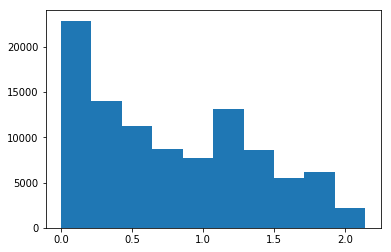

In [247]:
plt.hist(df['Reviewer_Score'].map(lambda x : np.log(11-x)))

(array([  778.,  1381.,  2380.,  3768.,  2518.,  6676., 11640., 14030.,
        19957., 36873.]),
 array([ 2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,  7.75,  8.5 ,
         9.25, 10.  ]),
 <a list of 10 Patch objects>)

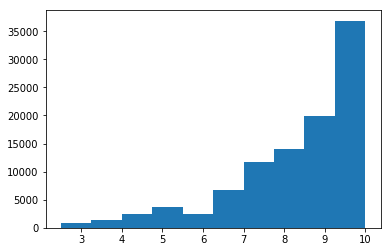

In [248]:
plt.hist(df['Reviewer_Score'])

In [249]:
rev_score = df.Reviewer_Score.unique()

In [250]:
df['Reviewer_Score'].sort_values().unique()

array([ 2.5,  2.9,  3. ,  3.1,  3.3,  3.5,  3.8,  4. ,  4.2,  4.4,  4.5,
        4.6,  5. ,  5.4,  5.5,  5.6,  5.8,  6. ,  6.3,  6.5,  6.7,  6.9,
        7. ,  7.1,  7.5,  7.9,  8. ,  8.1,  8.3,  8.5,  8.8,  9. ,  9.2,
        9.4,  9.5,  9.6, 10. ])

# Merging pos and neg reviews with the main Dataframe



In [251]:
df.isnull().sum()

Hotel_Address                       0
Additional_Number_of_Scoring        0
Review_Date                         0
Average_Score                       0
Hotel_Name                          0
                                   ..
Reviewer_Nationality_ Venezuela     0
Reviewer_Nationality_ Vietnam       0
Reviewer_Nationality_ Yemen         0
Reviewer_Nationality_ Zambia        0
Reviewer_Nationality_ Zimbabwe      0
Length: 213, dtype: int64

In [252]:
df= pd.concat([df, neg_reviews_df, pos_reviews_df ], axis=1)

In [253]:
df.shape

(100001, 2213)

In [254]:
neg_reviews_df.shape,pos_reviews_df.shape

((100001, 1000), (100001, 1000))

In [255]:
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  Reviewer_Nationality_   \
0  52.360576  4.915968                       0   
1  52.360576  4.915968                       0   
2  52.360576  4.915968                       0   
3  52.360576  4.915968                       0   
4  52.360576  4.915968                       0   

   Reviewer_Nationality_ Abkhazia Georgia   \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Reviewer_Nationality_ Afghanistan   Reviewer_Nationality_ Albania   \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   Reviewer_Nationality_ Algeria   Reviewer_Nationality_ Andorra   \
0                      

In [256]:
df.shape

(100001, 2213)

In [257]:
df.columns[:20]

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Reviewer_Nationality_ ',
       'Reviewer_Nationality_ Abkhazia Georgia ',
       'Reviewer_Nationality_ Afghanistan ', 'Reviewer_Nationality_ Albania '],
      dtype='object')

# Creating X and y

In [258]:
drop_list = ['Hotel_Address', 
            'Review_Date',
            'Hotel_Name',
            'days_since_review',
            'lat',
            'lng',
             'Tags',
            'Reviewer_Score',
            'Negative_Review',
            'Positive_Review'

            ]
X = df.drop( drop_list, axis=1)
y = df['Reviewer_Score']

In [259]:
X.columns

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Nationality_ ',
       'Reviewer_Nationality_ Abkhazia Georgia ',
       'Reviewer_Nationality_ Afghanistan ', 'Reviewer_Nationality_ Albania ',
       ...
       'worth', 'would', 'wouldn', 'wrong', 'year', 'years', 'yet', 'you',
       'young', 'your'],
      dtype='object', length=2203)

# Spliting the train and test datasets

In [260]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                             y,
                                                             test_size=0.25,
                                                             random_state=42)

In [261]:
X_train.shape

(75000, 2203)

In [262]:
X_test.shape

(25001, 2203)

In [263]:
y_train.shape

(75000,)

In [264]:
y_test.shape

(25001,)

# Scaling the data

In [265]:
# Instantiate Standard Scaler
ss = StandardScaler()

In [266]:
X_train.shape

(75000, 2203)

In [267]:
type(X_train)

pandas.core.frame.DataFrame

In [268]:
X_train.dtypes[:20]

Additional_Number_of_Scoring                    int64
Average_Score                                 float64
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Nationality_                           uint8
Reviewer_Nationality_ Abkhazia Georgia          uint8
Reviewer_Nationality_ Afghanistan               uint8
Reviewer_Nationality_ Albania                   uint8
Reviewer_Nationality_ Algeria                   uint8
Reviewer_Nationality_ Andorra                   uint8
Reviewer_Nationality_ Angola                    uint8
Reviewer_Nationality_ Antarctica                uint8
Reviewer_Nationality_ Antigua Barbuda           uint8
Reviewer_Nationality_ Argentina                 uint8
Reviewer_Nationality_ Armenia                   uint8
Reviewer_Nationality_ Aruba                     uint8
Reviewer_Nationality_ Austra

In [269]:
X_train_scaled = ss.fit_transform(X_train)

In [270]:
X_test_scaled = ss.transform(X_test)

# Performing logistic regression (Regularized by default)

The y variable here must be a category so we round our y variable (reviews) so it is integers which we can use in the modeling.

In [271]:
# Rounding up the ratings to floats with zero decimals

y_train = np.round(y_train, decimals=0)
y_test = np.round(y_test, decimals=0)

In [272]:
# Changing the ratings from float to integer. 
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [273]:
# Instantiate logistic regression model without regularization.
logreg = LogisticRegression()

In [274]:
# Fit logreg model.
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [275]:
# Generate predictions for test data from logistic regression model.
y_preds_test = logreg.predict(X_test)

In [276]:
# Calculating Accuracy using the train data
y_preds_train = logreg.predict(X_train)
logreg1 = logreg.score(X_train, y_train)
# Let's estimate our accuracy on the "new" test data
logreg2 = logreg.score(X_test, y_test)
print(f'Logistic Regression Accuracy Score on train/test data: {round(logreg1, 3),round(logreg2, 3)}')

Logistic Regression Accuracy Score on train/test data: (0.514, 0.467)


# Multinomial Naive Bayes

We fit multinomial Naive Bayes because count vectorizer gives us an integer count of words 
in a document.

In [277]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)
mnb1=mnb.score(X_train, y_train)
mnb2=mnb.score(X_test, y_test)
print(f'Accuracy Score on train/test data: {round(mnb1, 3),round(mnb2, 3)}')

Accuracy Score on train/test data: (0.386, 0.38)


# Gaussian Naive Bayes

In [278]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)
gnb1=gnb.score(X_train, y_train)
gnb2=gnb.score(X_test, y_test)
print(f'Accuracy Score on train/test data: {round(gnb1, 3),round(gnb2, 3)}')

Accuracy Score on train/test data: (0.417, 0.39)


# Predicted vs. actual reviews 

Text(0.5, 0, 'Actual Score')

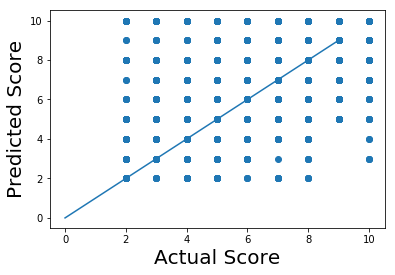

In [279]:
plt.scatter(y_test,y_preds_test)
plt.plot(range(10))
plt.ylabel('Predicted Score', fontsize=20)
plt.xlabel('Actual Score', fontsize=20)

In [280]:
abs(y_test - y_preds_test).sort_values()

40195    0
66431    0
39269    0
54920    0
89325    0
        ..
17502    8
35138    8
54024    8
95035    8
3831     8
Name: Reviewer_Score, Length: 25001, dtype: int64

In [281]:
# df['Negative_Review'][73900],df['Negative_Review'][72007]

In [282]:
# df['Positive_Review'][73900],df['Positive_Review'][72007]

In [283]:
# df['Reviewer_Score'][73900]

In [284]:
# y_test[73900]

In [285]:
enet_model_preds.shape

NameError: name 'enet_model_preds' is not defined

# Predicted reviews vs. Residuals

In [ ]:
resid = y_preds_train - y_train

In [ ]:
plt.scatter(y_train, resid)
plt.ylabel('Residuals', fontsize=20)
plt.xlabel('Actual Score', fontsize=20)